In [1]:
import tarfile
import os
import shutil

import glob
import numpy as np 

import tarfile

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.getcwd()

'/content'

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [5]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

--2021-02-03 14:49:20--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  19.3MB/s    in 44s     

2021-02-03 14:50:05 (17.1 MB/s) - ‘images.tar’ saved [793579520/793579520]



In [6]:
TARGET_PATH = "Images"
if os.path.exists(TARGET_PATH):
    shutil.rmtree(TARGET_PATH)

In [7]:
fname = "images.tar"
tar = tarfile.open(fname, "r:tar")
tar.extractall()
tar.close()

In [8]:
len(os.listdir(TARGET_PATH))

120

In [9]:
for dir_name in os.listdir(TARGET_PATH):
    breed_name = dir_name.split("-")[-1].lower()
    source_dir = os.path.join(TARGET_PATH, dir_name)
    target_dir = os.path.join(TARGET_PATH, breed_name)
    shutil.move(source_dir, target_dir) 

In [10]:
dataset = []
for filepath in glob.iglob(f'{TARGET_PATH}/**/*.jpg', recursive=True):
    print(filepath)
    breed_name = filepath.split("/")[1]
    dataset.append([filepath, breed_name])
dataset = np.array(dataset)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Images/pug/n02110958_12080.jpg
Images/pug/n02110958_4036.jpg
Images/pug/n02110958_15351.jpg
Images/pug/n02110958_3338.jpg
Images/pug/n02110958_10186.jpg
Images/pug/n02110958_15120.jpg
Images/pug/n02110958_15171.jpg
Images/pug/n02110958_5555.jpg
Images/pug/n02110958_16433.jpg
Images/pug/n02110958_14142.jpg
Images/pug/n02110958_10842.jpg
Images/pug/n02110958_14996.jpg
Images/pug/n02110958_12025.jpg
Images/pug/n02110958_14179.jpg
Images/pug/n02110958_15626.jpg
Images/pug/n02110958_11958.jpg
Images/pug/n02110958_6627.jpg
Images/pug/n02110958_340.jpg
Images/pug/n02110958_15873.jpg
Images/pug/n02110958_13042.jpg
Images/pug/n02110958_152.jpg
Images/pug/n02110958_10.jpg
Images/pug/n02110958_11825.jpg
Images/pug/n02110958_2144.jpg
Images/pug/n02110958_9008.jpg
Images/pug/n02110958_14594.jpg
Images/pug/n02110958_2745.jpg
Images/pug/n02110958_5834.jpg
Images/pug/n02110958_15722.jpg
Images/pug/n02110958_12120.jpg
Images/pug/n02110958_9505.jpg
Images/pug/n0211095

In [11]:
dataset

array([['Images/boxer/n02108089_4681.jpg', 'boxer'],
       ['Images/boxer/n02108089_78.jpg', 'boxer'],
       ['Images/boxer/n02108089_4440.jpg', 'boxer'],
       ...,
       ['Images/dhole/n02115913_1047.jpg', 'dhole'],
       ['Images/dhole/n02115913_1224.jpg', 'dhole'],
       ['Images/dhole/n02115913_1060.jpg', 'dhole']], dtype='<U74')

In [12]:
from sklearn.model_selection import train_test_split

train_image, test_image, train_target, test_target = train_test_split(dataset[:,0], dataset[:,1], stratify=dataset[:,1])

In [13]:
train_image.shape, test_image.shape

((15435,), (5145,))

In [14]:
import pandas as pd

pd.Series(train_target).value_counts() / len(train_target)

coated_retriever      0.014707
maltese_dog           0.012245
afghan_hound          0.011597
scottish_deerhound    0.011273
pomeranian            0.010625
                        ...   
doberman              0.007256
clumber               0.007256
dhole                 0.007256
pekinese              0.007256
redbone               0.007191
Length: 119, dtype: float64

In [15]:
pd.Series(test_target).value_counts() / len(test_target)

coated_retriever        0.014772
maltese_dog             0.012245
afghan_hound            0.011662
scottish_deerhound      0.011273
irish_wolfhound         0.010690
                          ...   
redbone                 0.007191
affenpinscher           0.007191
bouvier_des_flandres    0.007191
pekinese                0.007191
eskimo_dog              0.007191
Length: 119, dtype: float64

In [16]:
DATA_PATH = "dataset"
# shutil.rmtree(DATA_PATH)
if not os.path.exists(DATA_PATH):
    os.mkdir(DATA_PATH)
    os.makedirs(os.path.join(DATA_PATH, "train"))
    os.makedirs(os.path.join(DATA_PATH, "test"))
    
    for breed_name in set(test_target):
        os.makedirs(os.path.join(DATA_PATH, "train", breed_name))
        os.makedirs(os.path.join(DATA_PATH, "test", breed_name))

In [17]:
import shutil

for filepath, taregt_dir in zip(train_image.tolist(), train_target.tolist()):        
    filename = filepath.split("/")[-1]
    source_path = filepath
    target_dir = os.path.join(DATA_PATH, "train", taregt_dir, filename)
    shutil.copy(source_path, target_dir) 
    
for filepath, taregt_dir in zip(test_image.tolist(), test_target.tolist()):        
    filename = filepath.split("/")[-1]
    source_path = filepath
    target_dir = os.path.join(DATA_PATH, "test", taregt_dir, filename)
    shutil.copy(source_path, target_dir) 

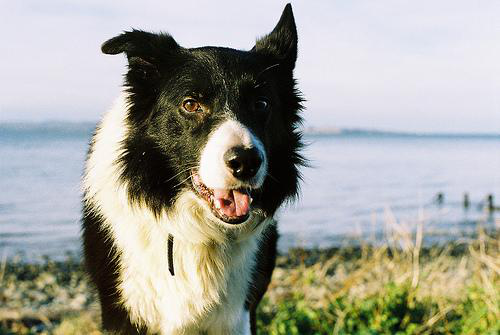

In [18]:
from PIL import Image
 
im = Image.open(target_dir)
im

['great_pyrenees' 'coated_wheaten_terrier' 'irish_wolfhound' 'basset'
 'komondor' 'yorkshire_terrier' 'japanese_spaniel' 'basset'
 'border_terrier' 'tzu']


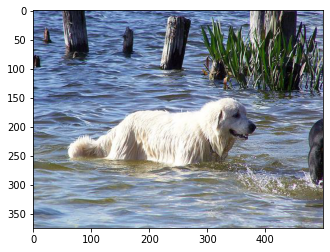

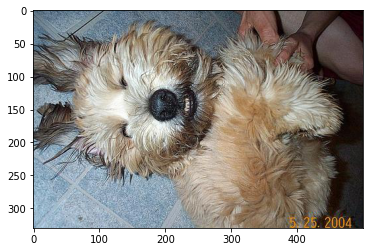

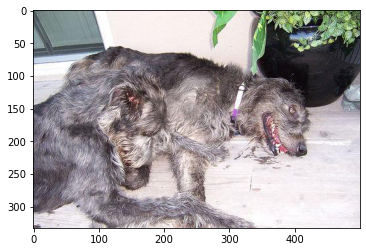

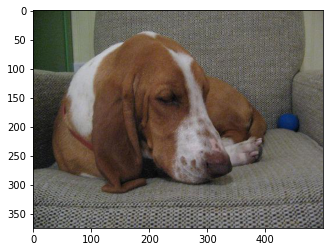

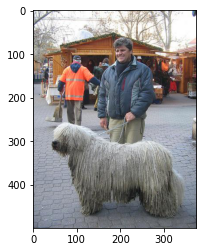

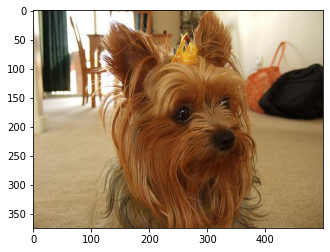

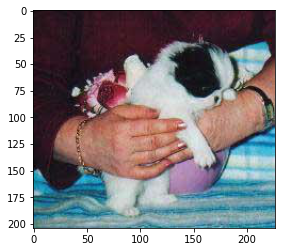

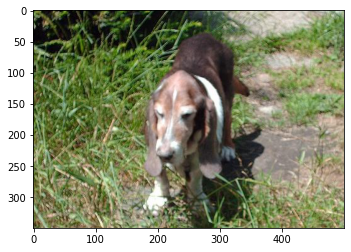

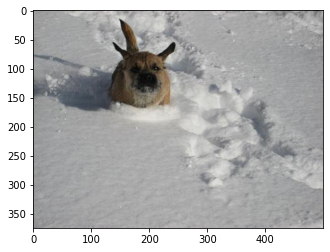

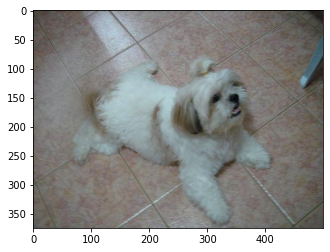

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def process(filename: str=None) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.imshow(image)

    
idx = np.random.choice(len(dataset), 10)

images = dataset[:, 0][idx]

for file in images:
    process(file)
    
print(dataset[:, 1][idx])

In [20]:
from torchvision import datasets, transforms, models

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

DATASET_PATH = "dataset"
# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(DATASET_PATH + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(DATASET_PATH + '/test', transform=test_transforms)

In [21]:
import torch
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)

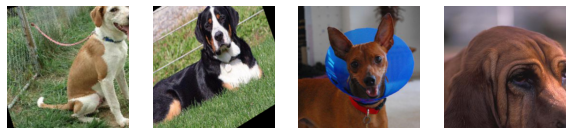

In [22]:
data_iter = iter(test_loader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=True)